In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


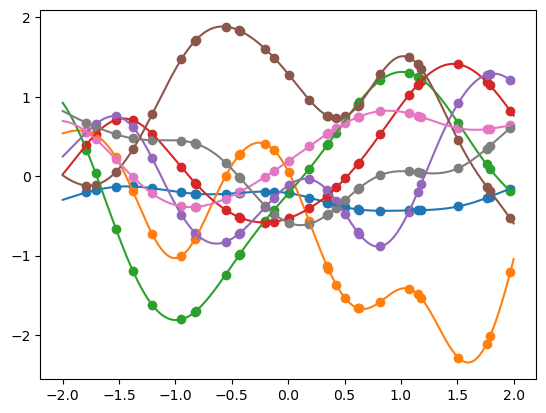

In [23]:
from data.gpdata_new_2 import GPData
import matplotlib.pyplot as plt

dataset = GPData(max_num_context=97)

batch = dataset.generate_batch(batch_size=8, testing=True)
for i in range(8):
    x_target = batch.x_target[i].flatten()
    y_target = batch.y_target[i].flatten()
    plt.plot(x_target, y_target)
for i in range(8):
    x_context = batch.x_context[i].flatten()
    y_context = batch.y_context[i].flatten()
    plt.scatter(x_context, y_context)
plt.show()

NeuralProcess(
  (latent_encoder): LatentEncoder(
    (phi): BatchMLP(
      (mlp): Sequential(
        (0): Linear(in_features=2, out_features=50, bias=True)
        (1): ReLU()
        (2): Linear(in_features=50, out_features=50, bias=True)
        (3): ReLU()
        (4): Linear(in_features=50, out_features=50, bias=True)
        (5): Identity()
      )
    )
    (rho): BatchMLP(
      (mlp): Sequential(
        (0): Linear(in_features=50, out_features=50, bias=True)
        (1): ReLU()
        (2): Linear(in_features=50, out_features=100, bias=True)
        (3): Identity()
      )
    )
  )
  (decoder): Decoder(
    (target_transform): Linear(in_features=1, out_features=50, bias=True)
    (decoder): BatchMLP(
      (mlp): Sequential(
        (0): Linear(in_features=100, out_features=50, bias=True)
        (1): ReLU()
        (2): Linear(in_features=50, out_features=50, bias=True)
        (3): ReLU()
        (4): Linear(in_features=50, out_features=50, bias=True)
        (5): ReLU()

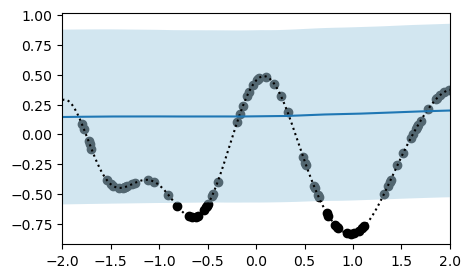

iter 1001: Avg. Loss = 68.64264427471161
iter 2001: Avg. Loss = 54.175499286651615
iter 3001: Avg. Loss = 41.410852742910386
iter 4001: Avg. Loss = 40.280066020727155
iter 5001: Avg. Loss = 39.748344100475315
iter 6001: Avg. Loss = 39.11733767414093
iter 7001: Avg. Loss = 37.455568788528446
iter 8001: Avg. Loss = 38.02522682344914
iter 9001: Avg. Loss = 37.62482048892975
iter 10001: Avg. Loss = 37.17426933956146
iter 10001: Avg. Loss SLOW = 433.6546295400858
iter 11001: Avg. Loss = 32.36841762503982
iter 12001: Avg. Loss = 25.196902141153814
iter 13001: Avg. Loss = 24.156306885749103
iter 14001: Avg. Loss = 22.724194189071657
iter 15001: Avg. Loss = 23.343587423026563
iter 16001: Avg. Loss = 21.659485162243246
iter 17001: Avg. Loss = 21.36631969791651
iter 18001: Avg. Loss = 21.228552280843257
iter 19001: Avg. Loss = 20.91869437891245
iter 20001: Avg. Loss = 20.42231297019124
iter 20001: Avg. Loss SLOW = 233.38477275414766


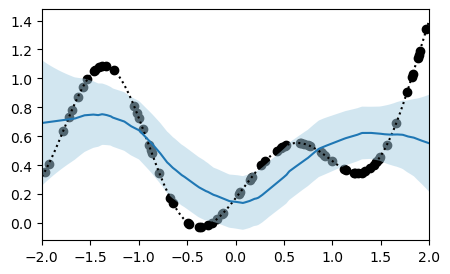

iter 21001: Avg. Loss = 20.41301464596391
iter 22001: Avg. Loss = 19.15451671439409
iter 23001: Avg. Loss = 19.7539810462147
iter 24001: Avg. Loss = 19.002557505086063
iter 25001: Avg. Loss = 19.675528727665544
iter 26001: Avg. Loss = 19.00229681804776
iter 27001: Avg. Loss = 18.523717404186726
iter 28001: Avg. Loss = 18.572434652328493
iter 29001: Avg. Loss = 18.680799240246415
iter 30001: Avg. Loss = 18.46716677044332
iter 30001: Avg. Loss SLOW = 191.24601352457702
iter 31001: Avg. Loss = 18.092609867930413
iter 32001: Avg. Loss = 18.660513833224773
iter 33001: Avg. Loss = 17.34602000902593
iter 34001: Avg. Loss = 17.53300635574758
iter 35001: Avg. Loss = 17.627539517864584
iter 36001: Avg. Loss = 17.522237691774965
iter 37001: Avg. Loss = 16.726778644278646
iter 38001: Avg. Loss = 16.521432282850146
iter 39001: Avg. Loss = 17.085381546586753
iter 40001: Avg. Loss = 16.090207804977894
iter 40001: Avg. Loss SLOW = 173.20572755426167


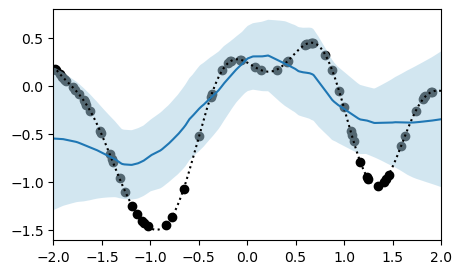

iter 41001: Avg. Loss = 16.38329144385457
iter 42001: Avg. Loss = 16.455549227923154
iter 43001: Avg. Loss = 15.401957851246
iter 44001: Avg. Loss = 10.962780637547374
iter 45001: Avg. Loss = 6.589960713222623
iter 46001: Avg. Loss = 4.89007902379334
iter 47001: Avg. Loss = 4.554910750001669
iter 48001: Avg. Loss = 4.399663639783859
iter 49001: Avg. Loss = 4.093149896726012
iter 50001: Avg. Loss = 3.829083090990782
iter 50001: Avg. Loss SLOW = 87.56042627508938
iter 51001: Avg. Loss = 2.6585488181114196
iter 52001: Avg. Loss = 2.343658432111144
iter 53001: Avg. Loss = 2.3965875525325537


In [26]:
import torch
from src.plot import plot_predictive
from src.np import NeuralProcess

x_dim = 1
y_dim = 1
determ_dim = 50  # Dimension of representation of context points
latent_dim = 50  # Dimension of sampled latent variable
hidden_dim = 50  # Dimension of hidden layers in encoder and decoder
np = NeuralProcess(x_dim=x_dim,
                   y_dim=y_dim,
                   hidden_dim=hidden_dim,
                   latent_dim=latent_dim,
                   determ_dim=determ_dim,
                   n_h_layers_decoder=3,
                   n_h_layers_phi_latent_encoder=2,
                   n_h_layers_rho_latent_encoder=1,
                   n_h_layers_phi_determ_encoder=6,
                   n_h_layers_rho_determ_encoder=0,
                   use_deterministic_path=False)
print(np)
print(sum(p.numel() for p in np.parameters() if p.requires_grad))

#data = SineData(max_num_context=30, random_kernel_parameters=True)
optimiser = torch.optim.Adam(np.parameters(), lr=3e-4)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")
np.to(device)


data = GPData(max_num_context=97)
train_loss = []
avg_loss_fast = 0
avg_loss_slow = 0
for iter in range(100000+1):
    np.training = True
    optimiser.zero_grad()

    batch = data.generate_batch(batch_size=16, device=device)
    p_y_pred, loss = np(batch.x_context, batch.y_context, batch.x_target, batch.y_target)

    loss.backward()
    optimiser.step()
    train_loss.append(loss.item())

    avg_loss_slow += loss.item()
    avg_loss_fast += loss.item()
    
    if iter % 1000 == 0 and iter > 0:
        print(f"iter {iter+1}: Avg. Loss = {avg_loss_fast/1000}")
        avg_loss_fast = 0 
    if iter % 10000 == 0 and iter > 0:
        print(f"iter {iter+1}: Avg. Loss SLOW = {avg_loss_slow/1000}")
        avg_loss_slow = 0 
    if iter % 20000 == 0:
        np.training = False
        batch = data.generate_batch(batch_size=1, testing=True, device=np.device)
        plot_predictive(np, batch, knowledge=None, save=False, iter=None)
        np.training = True

plt.plot(train_loss, label='train_loss')
window = 50
plt.plot([sum(train_loss[i:i+window])/window for i in range(len(train_loss)-window)], label=f'train_loss_{window}_smooth')
plt.legend()
plt.show()